## Coding Etiquette & Excel Reporting --> Cleaning & Geo

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Changing the format of the values visualization

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Reseting the maximum number of columns to display to default (all columns)

pd.set_option('display.max_columns', None)

In [4]:
# Importing project data

path = r'C:\Users\efens\cf_tasks\2023-07 Instacard Basket Analysis'
merged_all = pd.read_pickle(os.path.join(path, '02 Data', '022 Prepared Data', 'merged_all.pkl'))

In [5]:
merged_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


## 01. Remove PII data

In [6]:
# Removing last_name column

merged_clean = merged_all.drop(columns=['last_name'])

In [7]:
merged_clean.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both


## 02. Customer behavior in different geographic areas

#### Creating a list of Regions

In [8]:
# Defining US regions

def US_region(row):
    northeast_states = ['Maine', 'New Hampshire', 'Rhode Island', 'Vermont', 'Massachusetts', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
    midwest_states = ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin']
    south_states = ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia']
    west_states = ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']
    Washington_DC = ['District of Columbia']
    
    # Remove leading/trailing spaces
    state = row['state'].strip()  
    
    if state in northeast_states:
        return '1_Northeast'
    elif state in midwest_states:
        return '2_Midwest'
    elif state in south_states:
        return '3_South'
    elif state in west_states:
        return '4_West'
    elif state in Washington_DC:
        return 'Washington_DC'
    
    else:
        return 'Not enough data'  # e.g., missing values

In [9]:
# Applying the function US regions to each row and create a new column 'region'

merged_clean['region'] = merged_clean.apply(US_region, axis=1)

In [10]:
merged_clean.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spenders,median_days,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region
0,2539329,1,1,2,8,7.00,196,1,0,Soda,77,7,9.00,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South
1,2398795,1,2,3,7,15.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South
2,473747,1,3,3,12,21.00,196,1,1,Soda,77,7,9.00,Mid-range product,Regularly busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South
3,2254736,1,4,4,7,29.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Average orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South
4,431534,1,5,4,15,28.00,196,1,1,Soda,77,7,9.00,Mid-range product,Least busy,Least busiest days,Most orders,10,New customer,6.37,Low spender,20.00,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,both,3_South


In [11]:
merged_clean['region'].value_counts()

3_South          10178190
4_West            8292913
2_Midwest         7597325
1_Northeast       5722736
Washington_DC      613695
Name: region, dtype: int64

#### Differences in spending habits between the different U.S. regions

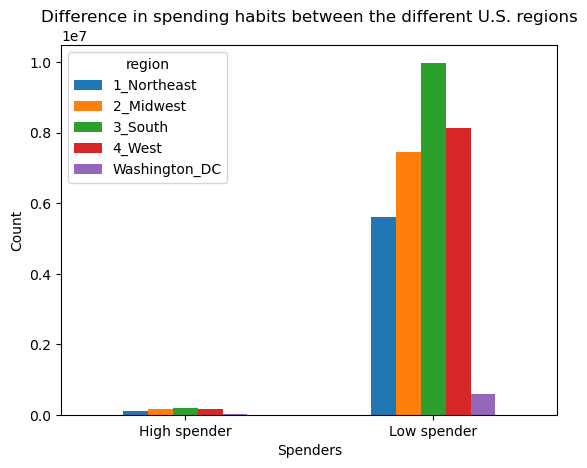

In [12]:
## Crossing spenders and regions

# Grouping and counting the data
region_counts = merged_clean.groupby(['spenders', 'region']).size().unstack()

# Creating a bar chart
bar = region_counts.plot(kind='bar')

# Adding title and labels to the plot
bar.set_title("Difference in spending habits between the different U.S. regions")
bar.set_xlabel("Spenders")
bar.set_ylabel("Count")

# Change the rotation on x-axes
plt.xticks(rotation=0)

# Showing the plot
plt.show()

In [13]:
merged_clean['spenders'].value_counts()

Low spender     31770614
High spender      634245
Name: spenders, dtype: int64

In [14]:
# Displaying the counts for each region
print(region_counts)

region        1_Northeast  2_Midwest  3_South   4_West  Washington_DC
spenders                                                             
High spender       108225     155975   197018   160354          12673
Low spender       5614511    7441350  9981172  8132559         601022


#### Exporting the chart

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis','041 Visualizations', 'chart_region_spenders.png'))

## 03. Customers who don’t generate much revenue for the app

#### Create an exclusion flag for low-activity customers (customers with less than 5 orders)

In [16]:
#Create an exclusion flag for low-activity customers with less than 5 orders
merged_clean.loc[merged_clean['max_order'] <= 5, 'activity_flag'] = 'low-activity customer'

In [17]:
#Create an exclusion flag for high-activity customers with more than 5 orders
merged_clean.loc[merged_clean['max_order'] > 5, 'activity_flag'] = 'high-activity customer'

In [18]:
#Checking the output
merged_clean['activity_flag'].value_counts(dropna=False)

high-activity customer    30171424
low-activity customer      2233435
Name: activity_flag, dtype: int64

In [19]:
# Creating a separate DataFrame for customers with less than 5 orders
df_low_customers=merged_clean[merged_clean['activity_flag'] == 'low-activity customer']

In [20]:
df_low_customers['max_order'].describe()

count   2233435.00
mean          4.05
std           0.81
min           1.00
25%           3.00
50%           4.00
75%           5.00
max           5.00
Name: max_order, dtype: float64

In [21]:
df_low_customers.shape

(2233435, 33)

In [22]:
# Exproting that as a separate df

df_low_customers.to_pickle(os.path.join(path, '02 Data','022 Prepared Data', 'df_low_customers.pkl'))

#### Excluding them from the data

In [23]:
# Excluding low_order_users from the merged_all df
filtered_merged_all = merged_clean[merged_clean['activity_flag'] == 'high-activity customer']

In [24]:
filtered_merged_all['max_order'].describe()

count   30171424.00
mean          35.20
std           24.75
min            6.00
25%           15.00
50%           29.00
75%           49.00
max           99.00
Name: max_order, dtype: float64

In [25]:
# Exproting that as a separate df

filtered_merged_all.to_pickle(os.path.join(path, '02 Data','022 Prepared Data', 'filtered_merged_all.pkl'))